In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
import nidata.fetchers.aws_fetcher as aws

In [3]:
local_files = aws.aws_fetcher('.', zip(['dwi_lr.nii.gz', 'dwi_lr.bval', 'dwi_lr.bvec'], 
                   ['HCP/992774/unprocessed/3T/Diffusion/992774_3T_DWI_dir95_LR.nii.gz',
                    'HCP/992774/unprocessed/3T/Diffusion/992774_3T_DWI_dir95_LR.bval',
                    'HCP/992774/unprocessed/3T/Diffusion/992774_3T_DWI_dir95_LR.bvec'], 
                                       [{}, {}, {}]), 
                              profile_name='hcp')

In [4]:
local_files

['./dwi_lr.nii.gz', './dwi_lr.bval', './dwi_lr.bvec']

In [5]:
import nibabel as nib

In [6]:
import dipy.reconst.dti as dti
import dipy.core.gradients as grad

In [7]:
gtab = grad.gradient_table(local_files[1], local_files[2])

In [8]:
data = nib.load(local_files[0]).get_data()

In [9]:
model = dti.TensorModel(gtab)

In [10]:
fit = model.fit(data) 

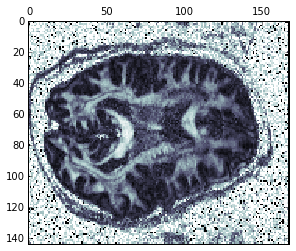

In [11]:
plt.matshow(fit.fa[..., fit.fa.shape[-1]//2], cmap=matplotlib.cm.bone)